In [13]:
import time
import numpy as np
import pandas as pd
import shogun as sg
from sklearn.model_selection import train_test_split

def saveInfo(name, my_time, my_acc, my_F1, my_precision, my_recall, timeDict, accDict, F1Dict, precisionDict, recallDict):
	timeDict[name] = my_time
	accDict[name] = my_acc
	F1Dict[name]= my_F1
	precisionDict[name] = my_precision
	recallDict[name] = my_recall
	# print("---{}: {} seconds ---".format (name, my_time))
	# print('{}, {} accuracy score: {}, F1-score: {}'.format(title, name, accuracy_score, my_F1))

def evaluateAndSave(name, train_time, features_test, labels_test, labels_predict, timeDict, accDict, F1Dict, precisionDict, recallDict):
	acc = sg.AccuracyMeasure().evaluate(labels_predict, labels_test)
	f1 = sg.F1Measure().evaluate(labels_predict, labels_test)
	prec = sg.PrecisionMeasure().evaluate(labels_predict, labels_test)
	rec = sg.RecallMeasure().evaluate(labels_predict, labels_test)
	print('Accuracy:', acc)
	print('F1:', f1)
	print('Precision:', prec)
	print('Recall:', rec)
	saveInfo(name, train_time, acc, f1, prec, rec, timeDict, accDict, F1Dict, precisionDict, recallDict)

df = pd.read_csv('./exercise_data/C_elegans_processed.csv', header=0)
train_seq, test_seq, train_label, test_label = train_test_split(df['sequences'], df['labels'], test_size=0.33, random_state=42)

train_label[train_label<0] = 0
test_label[test_label<0] = 0

print('train_seq shape:', train_seq.shape)
print('test_seq shape:', test_seq.shape)

train_seq shape: (1474,)
test_seq shape: (726,)


In [9]:
unique, counts = np.unique(test_label, return_counts=True)
dict(zip(unique, counts))

{0.0: 665, 1.0: 61}

In [4]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(train_seq)
train_seq = vectorizer.transform(train_seq)
test_seq  = vectorizer.transform(test_seq)

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

classifier = LogisticRegression()
classifier.fit(train_seq, train_label)
score = classifier.score(test_seq, test_label)
print('Accuracy: {:.4f}'.format(score))

Accuracy: 0.9160


Logistic: f1=0.000 auc=0.542


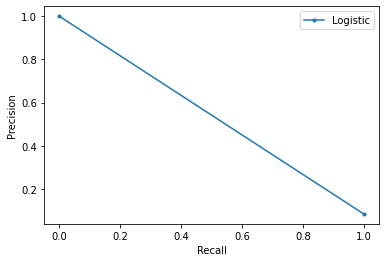

In [6]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot


lr_probs = classifier.predict_proba(test_seq)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = classifier.predict(test_seq)
lr_precision, lr_recall, _ = precision_recall_curve(test_label, lr_probs)
lr_f1, lr_auc = f1_score(test_label, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [21]:
from keras.preprocessing.text import Tokenizer
tk = Tokenizer(num_words=None, char_level=True)
tk.fit_on_texts(train_seq)
tk.word_index

{'a': 1, 't': 2, 'g': 3, 'c': 4}

In [15]:
train_seq_tok = tk.texts_to_sequences(train_seq)
test_seq_tok = tk.texts_to_sequences(test_seq)

In [22]:
print(train_seq[0])

ACTGGGATAATTTGAAACAATAAATTTTTTTTTGAATTGTAGGTGTCCTGCTTGCATCCAAAGGAGTCGATGATGTTGAGCA


In [23]:
print(train_seq_tok[0])

[4, 2, 2, 3, 2, 3, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 4, 1, 1, 2, 1, 1, 1, 3, 2, 1, 2, 2, 2, 2, 2, 4, 1, 3, 4, 4, 2, 3, 2, 3, 1, 3, 1, 1, 3, 1, 1, 4, 2, 3, 2, 1, 4, 4, 1, 1, 2, 1, 3, 1, 1, 4, 4, 4, 3, 2, 2, 3, 1, 3, 4, 4, 2, 2, 4, 3, 1, 4, 1, 1, 3, 2]


In [25]:
val = np.linspace(9, 20, 20)
print(val)

[ 9.          9.57894737 10.15789474 10.73684211 11.31578947 11.89473684
 12.47368421 13.05263158 13.63157895 14.21052632 14.78947368 15.36842105
 15.94736842 16.52631579 17.10526316 17.68421053 18.26315789 18.84210526
 19.42105263 20.        ]
